# Study reference calibration spectra

- author : Sylvie Dagoret-Campagne
- date : April 23th 2018


In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
import astropy
import astropy.units as u
from astropy.io import fits

In [31]:
from IPython.display import Image, display
from PIL import Image

In [32]:
import pysynphot as S
S.primary_area=1.02e5
S.binning=1.

In [33]:
CFHT_COLL_SURF=np.pi/4.*(3.6*u.m)**2/(u.cm)**2  # LSST collectif surface
WLMIN=3000.
WLMAX=11000.

In [34]:
NBINS=int(WLMAX-WLMIN)
BinWidth=(WLMAX-WLMIN)/float(NBINS)
WL=np.linspace(WLMIN,WLMAX,NBINS)

In [35]:
CFHT_COLL_SURF.decompose()

<Quantity 101787.6019763093>

In [36]:
S.refs.setref(area=CFHT_COLL_SURF.decompose(), waveset=None)

In [37]:
#S.refs.set_default_waveset(minwave=WLMIN, maxwave=WLMIN, num=NBINS, delta=1., log=True)

In [38]:
S.refs.showref()

thermtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/tae17277m_tmt.fits
   waveset: Min: 500, Max: 26000, Num: 10000, Delta: None, Log: True
 comptable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/16n1832tm_tmc.fits
graphtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/14l1632sm_tmg.fits
      area: 101787.601976


In [39]:
10**(S.units.ABZERO/2.5)

3.630780547701003e-20

# PySynPhot

In [40]:
!ls Figures

MegaCamFilters+QE.gif                 every_transmission.png
MegaPrime-Optics-Transmission-75p.gif filters_transmissions.png
VegaPhotomSys.png


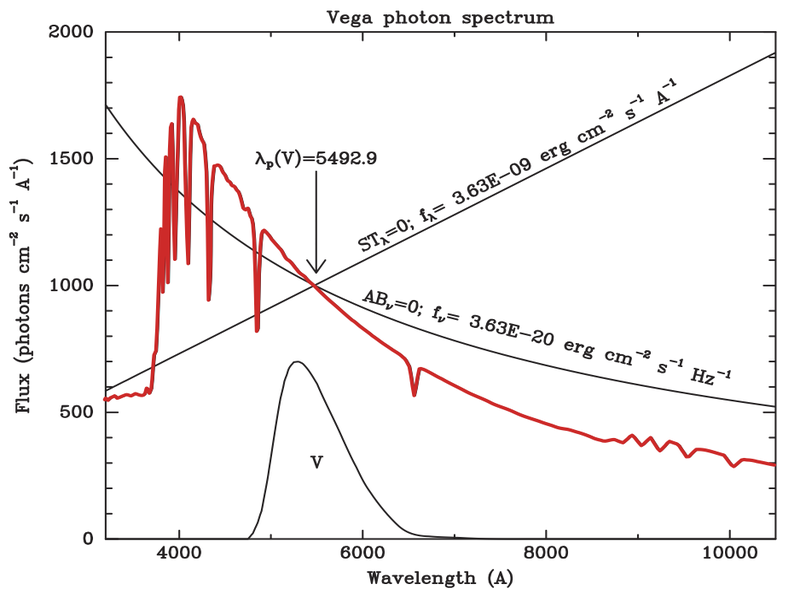

In [55]:
img=Image.open("Figures/VegaPhotomSys.png")
img = img.resize((800, 600),Image.ANTIALIAS)
display(img)

# Vega spectrum

- photlam: number in photons per (cm^2.s.A)

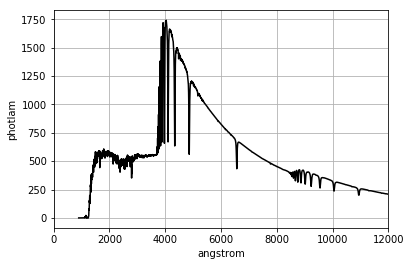

In [42]:
NewVega=S.Vega.convert('photlam')
plt.plot(S.Vega.wave, S.Vega.flux,'k-')
plt.xlim(0, 12000)
plt.xlabel(S.Vega.waveunits)
plt.ylabel(S.Vega.fluxunits)
#plt.title(os.path.basename(S.Vega.name))
plt.grid()

# Reference spectrum for calibration in AB

- reference flux in erg/cm2/s/Hz

In [43]:
# AB source in erg/cm2/s/Hz
f_0=10**(S.units.ABZERO/2.5)
print f_0

3.6307805477e-20


- generate the flux flat in Hz bins

In [44]:
calib_source=S.FlatSpectrum(10**(S.units.ABZERO/2.5),fluxunits='fnu')
print calib_source.flux

[  3.63078055e-20   3.63078055e-20   3.63078055e-20 ...,   3.63078055e-20
   3.63078055e-20   3.63078055e-20]


- plot flat spectrum 

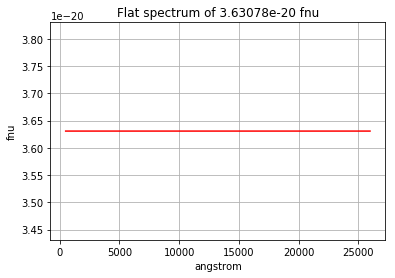

In [45]:
plt.plot(calib_source.wave,calib_source.flux,'r-')
plt.xlabel(calib_source.waveunits)
plt.ylabel(calib_source.fluxunits)
plt.title(calib_source.name)
#plt.ylim(0,2000.)
#plt.xlim(0.,11000.)
plt.grid()

- convert flat spectrum in photlam (photon/cm^2/s/A)

In [46]:
calib_source.convert('photlam')

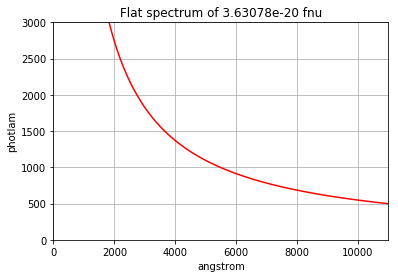

In [47]:
plt.plot(calib_source.wave,calib_source.flux,'r-')
plt.xlabel(calib_source.waveunits)
plt.ylabel(calib_source.fluxunits)
plt.title(calib_source.name)
plt.ylim(0,3000.)
plt.xlim(0.,11000.)
plt.grid()

# Reference spectrum in ST

- ST source in erg/cm2/s/A

In [48]:
f_0_2=10**(S.units.STZERO/2.5)
print f_0_2

3.6307805477e-09


In [49]:
calib_source2=S.FlatSpectrum(10**(S.units.STZERO/2.5),fluxunits='flam')
calib_source2.convert('photlam')

# Compare Vega spectrum with AB reference and ST reference spectra

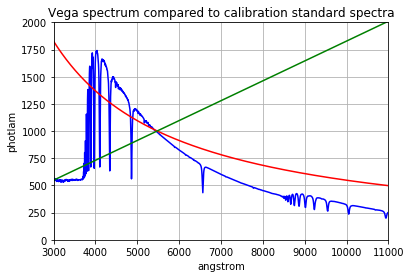

In [50]:
plt.plot(S.Vega.wave, S.Vega.flux,'b-')
plt.plot(calib_source.wave,calib_source.flux,'r-')
plt.plot(calib_source2.wave,calib_source2.flux,'g-')
plt.xlabel(calib_source.waveunits)
plt.ylabel(calib_source.fluxunits)
plt.title("Vega spectrum compared to calibration standard spectra")
plt.ylim(0,2000.)
plt.xlim(3000.,11000.)
plt.grid()

# Transmission in visible

In [51]:
bp_V = S.ObsBandpass('johnson,v')

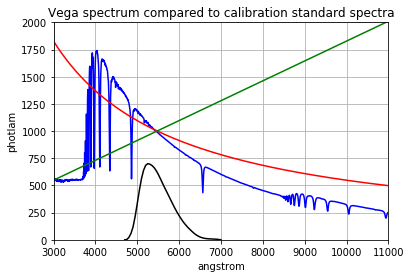

In [52]:
plt.plot(S.Vega.wave, S.Vega.flux,'b-')
plt.plot(calib_source.wave,calib_source.flux,'r-')
plt.plot(calib_source2.wave,calib_source2.flux,'g-')
plt.xlabel(calib_source.waveunits)
plt.ylabel(calib_source.fluxunits)
plt.title("Vega spectrum compared to calibration standard spectra")
plt.ylim(0,2000.)
plt.xlim(3000.,11000.)
plt.grid()

plt.plot(bp_V.wave,700*bp_V.throughput,'k-')

# Observation of AB spectrun in V band

In [53]:
obs = S.Observation(calib_source, bp_V)

(/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


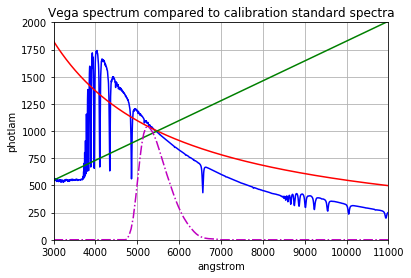

In [54]:
plt.plot(S.Vega.wave, S.Vega.flux,'b-')
plt.plot(calib_source.wave,calib_source.flux,'r-')
plt.plot(calib_source2.wave,calib_source2.flux,'g-')
plt.xlabel(calib_source.waveunits)
plt.ylabel(calib_source.fluxunits)
plt.title("Vega spectrum compared to calibration standard spectra")
plt.plot(obs.wave,obs.flux,'m-.')
plt.xlabel(obs.waveunits)
plt.ylabel(obs.fluxunits)
plt.ylim(0,2000.)
plt.xlim(3000.,11000.)
plt.grid()